In [75]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [76]:
df = pd.read_csv('new_^IXIC.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,truth
0,2020-07-27,10421.700195,10546.440430,10399.860352,10536.269531,10536.269531,4.244570e+09,1
1,2020-07-28,10509.200195,10523.639648,10397.870117,10402.089844,10402.089844,3.894660e+09,1
2,2020-07-29,10474.700195,10567.910156,10464.000000,10542.940430,10542.940430,4.009640e+09,1
3,2020-07-30,10450.120117,10609.589844,10412.089844,10587.809570,10587.809570,4.185810e+09,1
4,2020-07-31,10741.469727,10747.799805,10557.700195,10745.269531,10745.269531,4.438730e+09,1


In [77]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,truth
Date,,,,,,,
2020-07-27,10421.700195,10546.440430,10399.860352,10536.269531,10536.269531,4.244570e+09,1
2020-07-28,10509.200195,10523.639648,10397.870117,10402.089844,10402.089844,3.894660e+09,1
2020-07-29,10474.700195,10567.910156,10464.000000,10542.940430,10542.940430,4.009640e+09,1
2020-07-30,10450.120117,10609.589844,10412.089844,10587.809570,10587.809570,4.185810e+09,1
2020-07-31,10741.469727,10747.799805,10557.700195,10745.269531,10745.269531,4.438730e+09,1


In [78]:
df['Close'].dtypes

dtype('float64')

In [79]:
df['truth'] = df['truth'].astype(float)

In [80]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
truth        float64
dtype: object

In [81]:
df["Close"].head()

Date
2020-07-27    10536.269531
2020-07-28    10402.089844
2020-07-29    10542.940430
2020-07-30    10587.809570
2020-07-31    10745.269531
Name: Close, dtype: float64

In [82]:
# df["Close"] = df["Close"].str.replace(",","")
#  = df["Close"].apply(lambda x: float(x))
# df["Close"]=df["Close"].apply(pd.to_numeric)

In [83]:
df["Close"] = df["Close"].astype(str).str.replace(",","")
close = df["Close"].apply(lambda x: float(x))
df["Close"]=df["Close"].apply(pd.to_numeric)

In [84]:
df["Open"] = df["Open"].astype(str).str.replace(",","")
open = df["Close"].apply(lambda x: float(x))

In [85]:
df["High"] = df["High"].astype(str).str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [86]:
df["Low"] = df["Low"].astype(str).str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

In [87]:
df["Adj Close"] = df["Adj Close"].astype(str).str.replace(",","")
adjclose = df["Adj Close"].apply(lambda x: float(x))

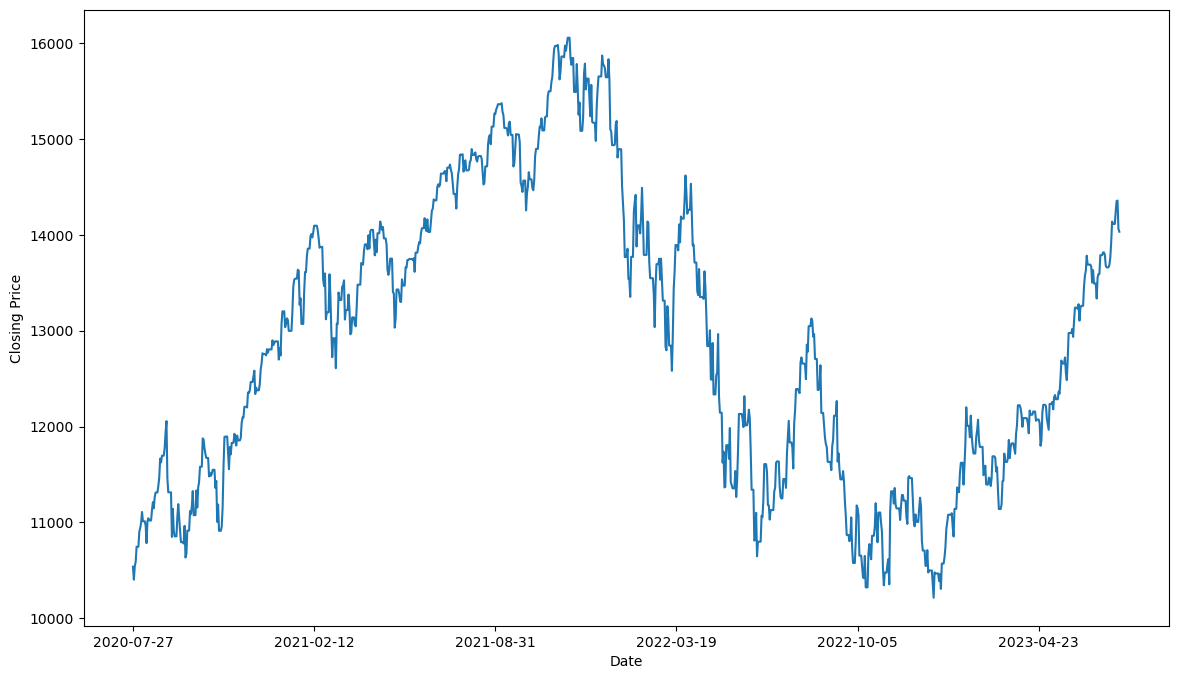

In [88]:
df['Close'].plot(figsize=(14,8))
plt.ylabel("Closing Price")
plt.show()

**Data Pre-processing**

In [89]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
truth        0
dtype: int64


In [90]:
# Check the counts of different values in the "Close" column
close_counts = df["Close"].value_counts()

# Display the counts of different values in the "Close" column
print("Value counts in the 'Close' column:")
print(close_counts)

Value counts in the 'Close' column:
14095.469727    4
12131.129883    4
13480.110352    4
10497.860352    4
11079.160156    4
               ..
15286.639648    1
15248.250000    1
15105.580078    1
15037.759766    1
14032.809570    1
Name: Close, Length: 752, dtype: int64


In [91]:
# Check for missing values again after dropping the "Volume" column
missing_values_after_drop = df.isna().sum()

# Display the number of missing values in each column after dropping "Volume"
print("Missing values in each column after dropping 'Volume':")
print(missing_values_after_drop)

Missing values in each column after dropping 'Volume':
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
truth        0
dtype: int64


**Feature Selection**

In [92]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,truth
Date,,,,,,,
2023-07-17,14149.919922,14274.410156,14138.009766,14244.950195,14244.950195,4.593160e+09,1.0
2023-07-18,14212.25,14396.69043,14176.110352,14353.639648,14353.639648,4.824070e+09,1.0
2023-07-19,14398.530273,14446.549805,14317.089844,14358.019531,14358.019531,5.112420e+09,1.0
2023-07-20,14273.290039,14309.919922,14030.620117,14063.309570,14063.30957,5.128020e+09,1.0
2023-07-21,14148.179688,14179.009766,14020.450195,14032.809570,14032.80957,5.254180e+09,1.0


In [93]:
x = df.iloc[:, [0, 1, 2, 4, 5, 6]].values

In [94]:
print(x)

[['10421.700195' '10546.44043' '10399.860352' '10536.269531' 4244570000.0
  1.0]
 ['10509.200195' '10523.639648' '10397.870117' '10402.089844'
  3894660000.0 1.0]
 ['10474.700195' '10567.910156' '10464.0' '10542.94043' 4009640000.0 1.0]
 ...
 ['14398.530273' '14446.549805' '14317.089844' '14358.019531'
  5112420000.0 1.0]
 ['14273.290039' '14309.919922' '14030.620117' '14063.30957' 5128020000.0
  1.0]
 ['14148.179688' '14179.009766' '14020.450195' '14032.80957' 5254180000.0
  1.0]]


In [95]:
y = df.iloc[:, [3]].values

In [96]:
print(y)

[[10536.269531]
 [10402.089844]
 [10542.94043 ]
 ...
 [14358.019531]
 [14063.30957 ]
 [14032.80957 ]]


In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=0)

In [98]:
y_train = y_train.ravel()

In [99]:
# Scaling the features
# Normalizing inputs
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

Hyperparameter Tuning
For a random forest regression model, we are considering the follwing parameters:

n_estimators — number of trees in the forest <br>
max_depth — maximum depth in a tree <br>
min_samples_split — minimum number of data points before the sample is split <br>
min_samples_leaf — minimum number of leaf nodes that are required to be sampled <br>
bootstrap — sampling for data points, true or false <br>
random_state — generated random numbers for the random forest. <br>

In [100]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=10, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
{'random_state': 2, 'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 14, 'bootstrap': True}


Apply model and Predict

In [115]:
model = RandomForestRegressor(n_estimators=1000, random_state=2, min_samples_split=2, min_samples_leaf=1, max_depth=14, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [116]:
print(predict)

[13768.48574623 12594.96311742 10791.96710832 13311.40633693
 15514.95810716 11514.22005688 11312.28247491 12012.85250901
 15363.23052428 13748.85734436 11803.52450781 14188.41820028
 13479.09575721 12336.80542871 14112.5437503  11534.75430549
 11579.66463308 13541.69520412 14497.99942982 11719.97803208
 14943.71078257 14095.41033441 10708.66491002 12491.78809405
 15927.64706456 13239.29261703 11339.22144314 11425.55751395
 13614.87984556 13626.1480164  12129.99110075 13624.67453309
 12233.11581129 10360.51659184 13752.24103916 13710.72933897
 11627.32576778 14870.56459305 13688.30230563 13533.64583016
 13814.58347038 13232.26703912 11127.94669598 11461.44202932
 14428.45597624 10856.2755599  14112.3867542  11450.3484905
 14654.61567379 11552.41081851 11332.55304291 13795.29529989
 14952.12338988 15537.23404952 14834.80143532 12087.59164169
 10909.61275704 11178.21186414 11330.13007717 14824.96970347
 13914.84459371 11246.45050297 10964.33110635 15408.82933784
 10360.25606157 15860.128

In [117]:
print(predict.shape)

(327,)


In [118]:
import sklearn.metrics as metrics

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 5))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 5))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 5))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 5))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
             

Mean Absolute Error: 6.66973
Mean Squared Error: 183.53684
Root Mean Squared Error: 13.54758
(R^2) Score: 0.99992
Train Score : 100.00% and Test Score : 99.99% using Random Tree Regressor.


In [119]:
df.index

Index(['2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
       '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
       ...
       '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-15', '2023-07-16',
       '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21'],
      dtype='object', name='Date', length=1090)

In [120]:
df.index[0]

'2020-07-27'

In [121]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-327], periods=len(predict), freq="D"))

In [122]:
predictions

,Predictions
2022-08-29,13768.485746
2022-08-30,12594.963117
2022-08-31,10791.967108
2022-09-01,13311.406337
2022-09-02,15514.958107
...,...
2023-07-17,13855.087506
2023-07-18,11608.684229
2023-07-19,13542.985237
2023-07-20,15044.768896


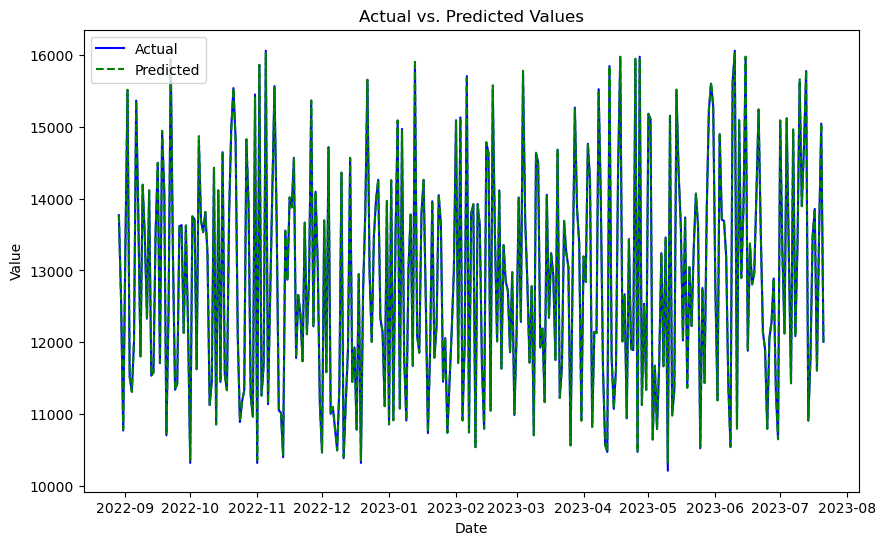

In [123]:
# Convert y_test and predict to 1-dimensional arrays
y_test = np.array(y_test).flatten()
predict = np.array(predict).flatten()

# Create pandas Series
y_test_series = pd.Series(y_test, index=pd.date_range(start=df.index[-327], periods=len(y_test), freq="D"))
predict_series = pd.Series(predict, index=pd.date_range(start=df.index[-327], periods=len(predict), freq="D"))

plt.figure(figsize=(10, 6))
plt.plot(y_test_series, label='Actual', color='blue')
plt.plot(predict_series, label='Predicted', color='green', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [130]:
tendays_df_pred = pd.DataFrame(predictions[:7])

In [131]:
tendays_df_pred 

,0
0,13768.485746
1,12594.963117
2,10791.967108
3,13311.406337
4,15514.958107
5,11514.220057
6,11312.282475


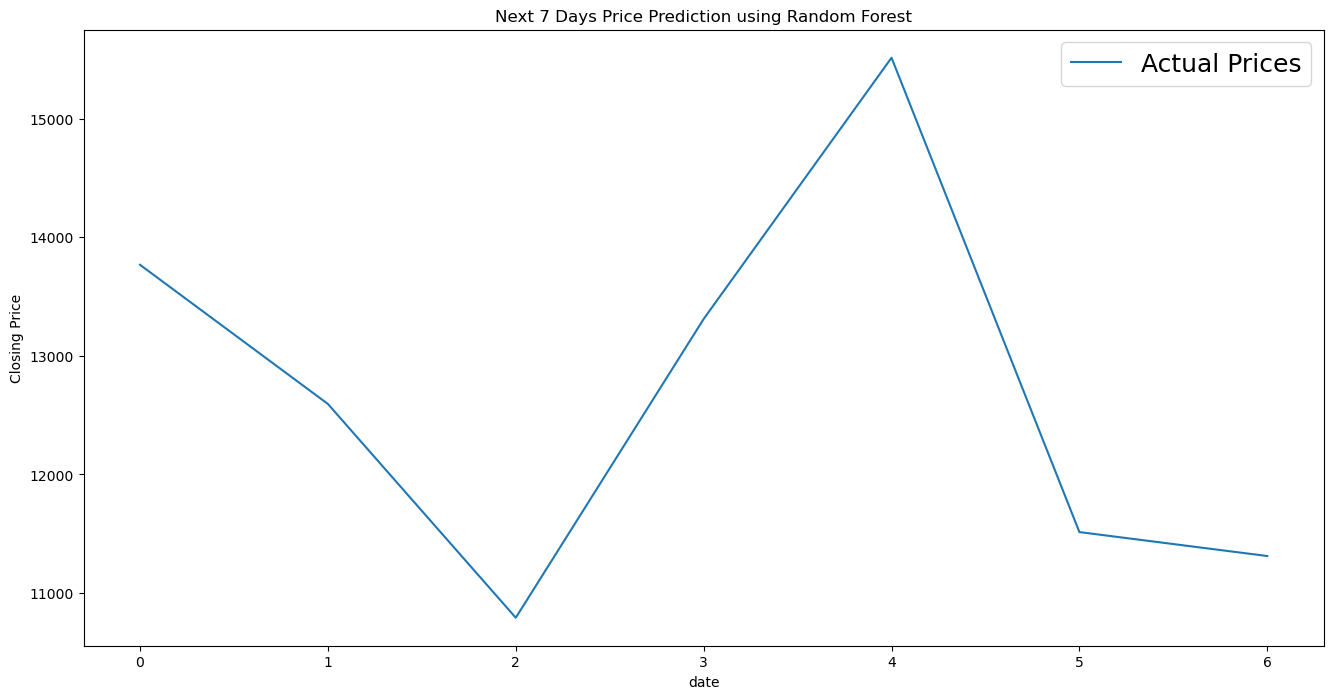

In [132]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# predictions[len(tendays_df_pred)+(look_back*2)+1:len(df)-1, :] = test_predict
plt.figure(figsize=(16, 8))
plt.title('Next 7 Days Price Prediction using Random Forest')
plt.xlabel('date')
plt.ylabel('Closing Price')

# Assuming you have two sets of data, tendays_df_pred and test_predict
# You need to label each plot so that they appear in the legend
plt.plot(tendays_df_pred, label='Actual Prices')  # Provide a label for this data
# plt.plot(test_predict, label='Predicted Prices')  # Uncomment this line if you have 'test_predict' data and want it in the legend

plt.legend(fontsize=18)  # Display the legend with the specified fontsize
plt.show()


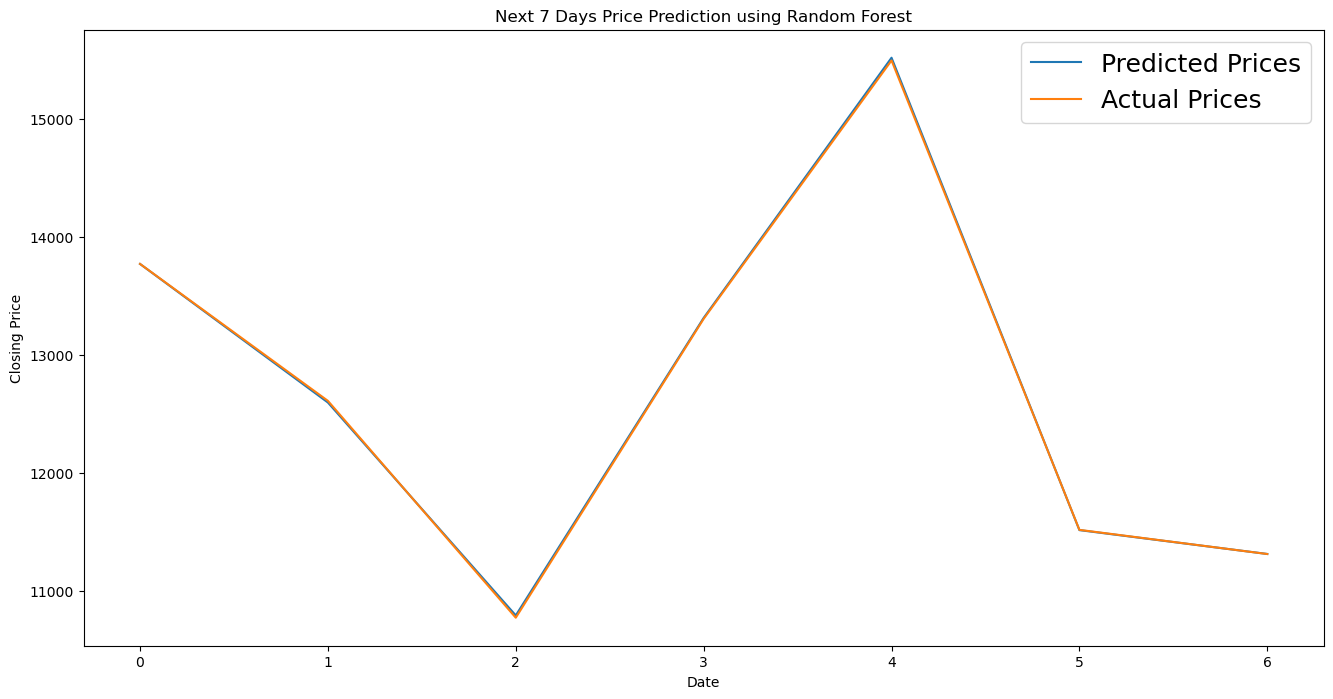

In [138]:
tendays_df_pred = pd.DataFrame(predictions[:7])
actual_prices = pd.DataFrame(y_test[:7])  # Assuming you have actual values data

plt.figure(figsize=(16, 8))
plt.title('Next 7 Days Price Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Plot actual and predicted prices
plt.plot(tendays_df_pred, label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices')

plt.legend(fontsize=18)
plt.show()


In [136]:
# 7-day error in short-term forecast
predictions = model.predict(X_test)

predictions_7_days = predictions[:7]
y_test_7_days = y_test[:7]

mae_7_days = metrics.mean_absolute_error(y_test_7_days, predictions_7_days)
mse_7_days = metrics.mean_squared_error(y_test_7_days, predictions_7_days)
rmse_7_days = np.sqrt(mse_7_days)

print("7 day MAE:", mae_7_days)
print("7 day MSE:", mse_7_days)
print("7 day RMSE:", rmse_7_days)

7 day MAE: 9.716488398487595
7 day MSE: 170.44335702903896
7 day RMSE: 13.055395705570895


In [128]:
# 30-day error in short-term forecast
predictions = model.predict(X_test)

predictions_30_days = predictions[:30]
y_test_30_days = y_test[:30]

mae_30_days = metrics.mean_absolute_error(y_test_30_days, predictions_30_days)
mse_30_days = metrics.mean_squared_error(y_test_30_days, predictions_30_days)
rmse_30_days = np.sqrt(mse_30_days)

print("30 day MAE:", mae_30_days)
print("30 day MSE:", mse_30_days)
print("30 day RMSE:", rmse_30_days)

30 day MAE: 4.804434505708681
30 day MSE: 59.355348187481795
30 day RMSE: 7.704242220198025


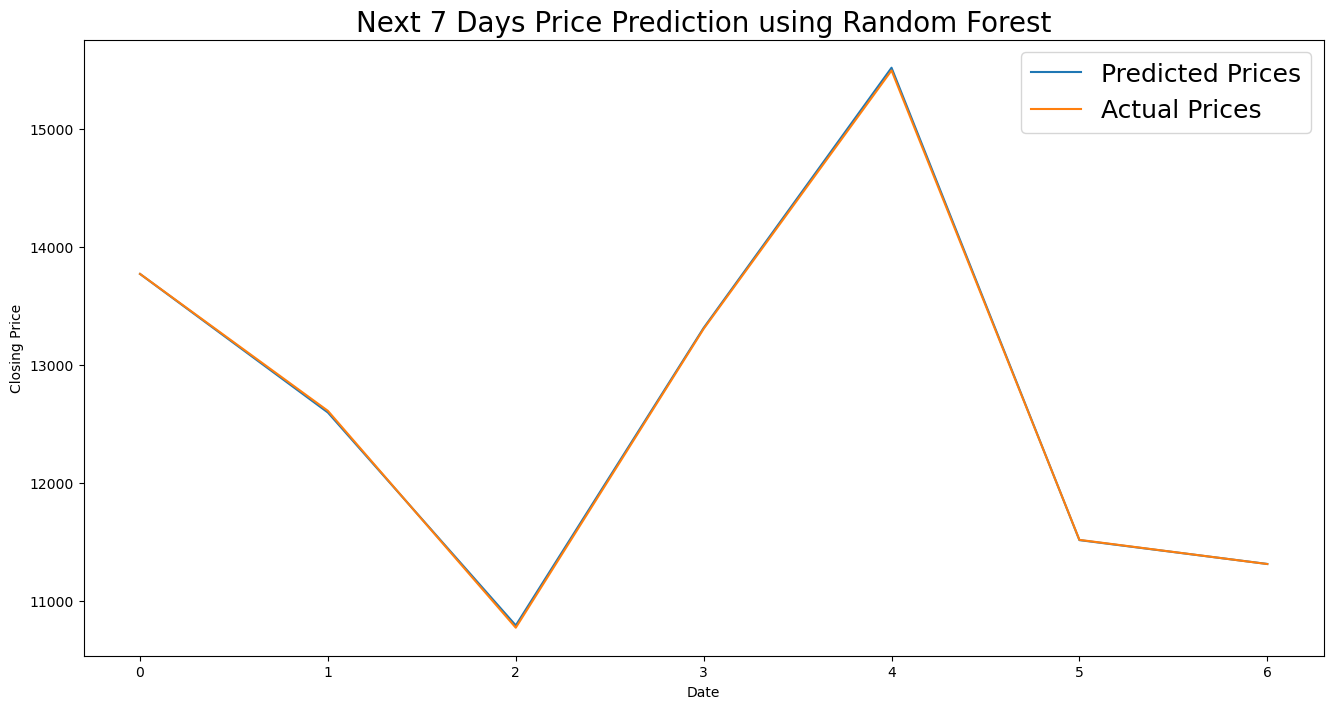

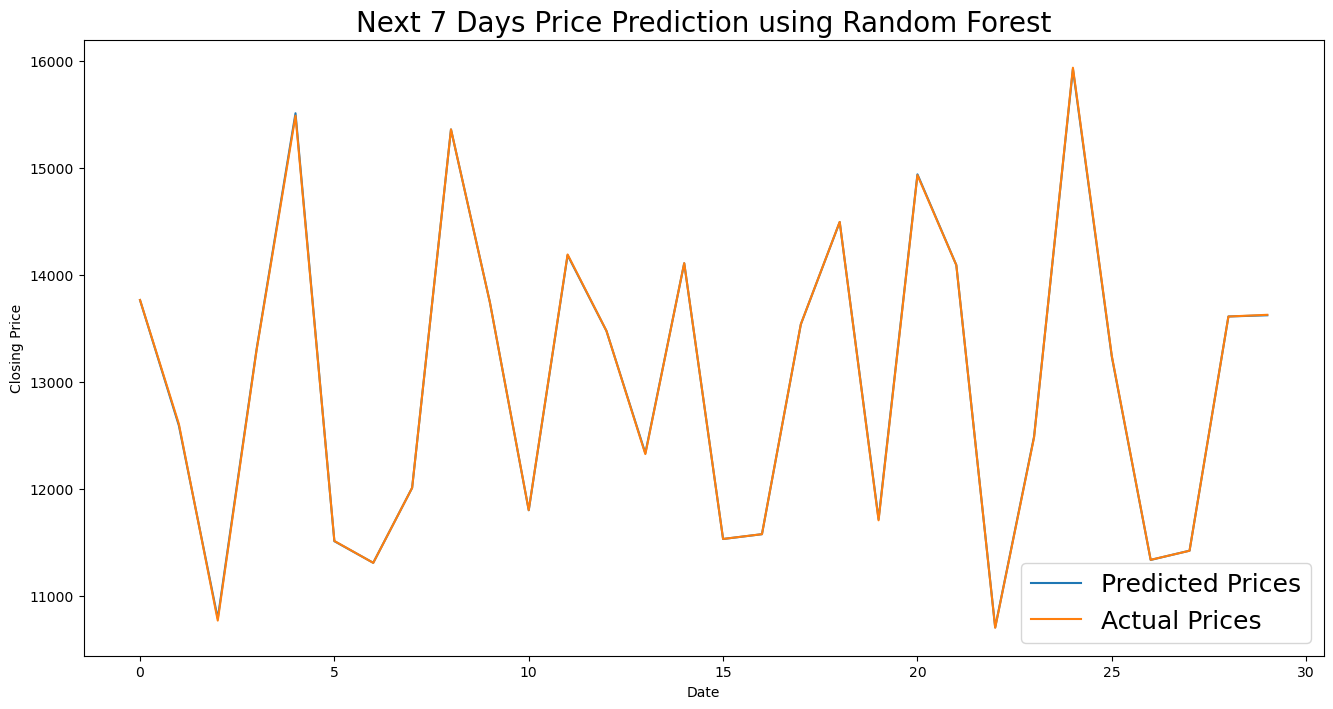

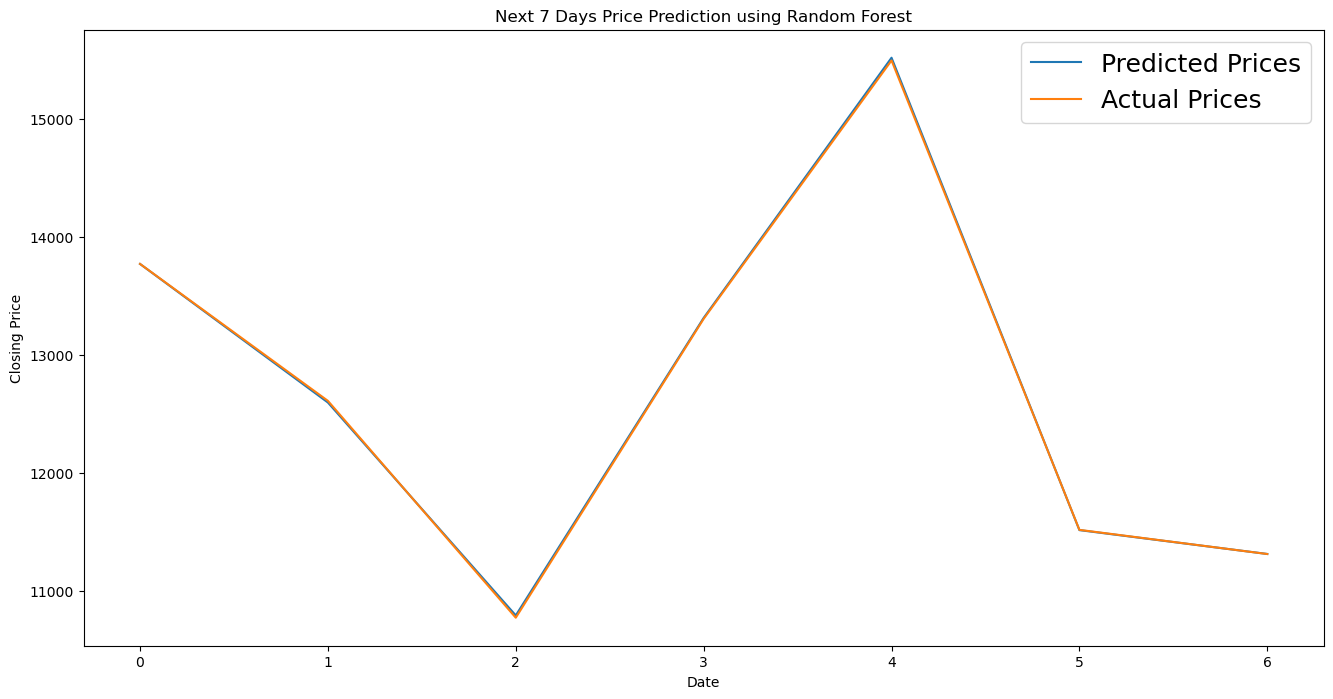

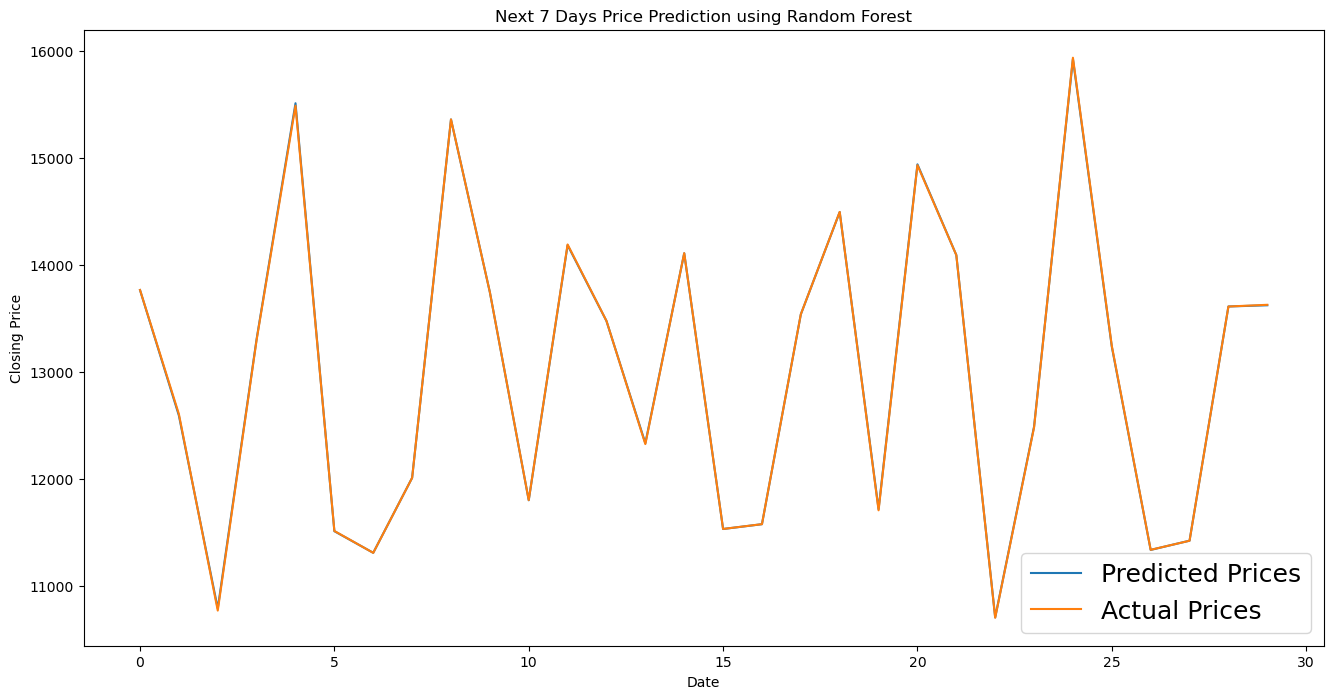

In [142]:
tendays_df_pred = pd.DataFrame(predictions[:7])
actual_prices = pd.DataFrame(y_test[:7])  # Assuming you have actual values data

plt.figure(figsize=(16, 8))
plt.title('Next 7 Days Price Prediction using Random Forest', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Plot actual and predicted prices
plt.plot(tendays_df_pred, label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices')

plt.legend(fontsize=18)
plt.show()


tendays_df_pred = pd.DataFrame(predictions[:30])
actual_prices = pd.DataFrame(y_test[:30])  # Assuming you have actual values data

plt.figure(figsize=(16, 8))
plt.title('Next 7 Days Price Prediction using Random Forest', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Plot actual and predicted prices
plt.plot(tendays_df_pred, label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices')

plt.legend(fontsize=18)
plt.show()






tendays_df_pred = pd.DataFrame(predictions[:7])
actual_prices = pd.DataFrame(y_test[:7])  # Assuming you have actual values data

plt.figure(figsize=(16, 8))
plt.title('Next 7 Days Price Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Plot actual and predicted prices
plt.plot(tendays_df_pred, label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices')

plt.legend(fontsize=18)
plt.show()


tendays_df_pred = pd.DataFrame(predictions[:30])
actual_prices = pd.DataFrame(y_test[:30])  # Assuming you have actual values data

plt.figure(figsize=(16, 8))
plt.title('Next 7 Days Price Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Plot actual and predicted prices
plt.plot(tendays_df_pred, label='Predicted Prices')
plt.plot(actual_prices, label='Actual Prices')

plt.legend(fontsize=18)
plt.show()
